In [1]:
# Preprocessing data

import os
import json
import math
import librosa

DATASET_PATH = "data/genre_samples"
JSON_PATH = "data.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # time in sec
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

def save_data(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512, num_segments=10):

    # dictionary to store data -> (genres, labels, mfcc_values)
    data = {
        "genres": [],
        "labels": [],
        "mfcc_values": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length) # round number to higher int = 1.2 -> 2

    # loop through all genres
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        
        # ensure that we're not at root
        if dirpath is not dataset_path:

            # save names of folders (genres)
            # split - genre_samples/rock -> ["genre_samples", "rock"]
            genre = dirpath.split("/")[-1] # get the last item in the list
            data["genres"].append(genre)
            print("Processing: {}".format(genre))

            # process files for a specific genre
            for f in filenames:

                # load audio files
                file_path = os.path.join(dirpath, f)
                sample, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process segments, extract mfcc and store data
                for s in range(num_segments):

                    # calculate start and end point for current segment
                    start_point = int(samples_per_segment * s)
                    end_point = int(start_point + samples_per_segment)

                    # extraxt mfcc
                    mfcc = librosa.feature.mfcc(sample[start_point:end_point],sr=sample_rate, n_fft=n_fft, n_mfcc=n_mfcc, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store mfcc for segment if it has the expected length
                    if len(mfcc) == num_mfcc_vectors_per_segment:

                        data["mfcc_values"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, s+1))

    # save mfcc to json
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

# main
if __name__ == "__main__":
    save_data(DATASET_PATH, JSON_PATH)
    print("Data stored in JSON")

Processing: jazz
data/genre_samples/jazz/jazz.00090.wav, segment:1
data/genre_samples/jazz/jazz.00090.wav, segment:2
data/genre_samples/jazz/jazz.00090.wav, segment:3
data/genre_samples/jazz/jazz.00090.wav, segment:4
data/genre_samples/jazz/jazz.00090.wav, segment:5
data/genre_samples/jazz/jazz.00090.wav, segment:6
data/genre_samples/jazz/jazz.00090.wav, segment:7
data/genre_samples/jazz/jazz.00090.wav, segment:8
data/genre_samples/jazz/jazz.00090.wav, segment:9
data/genre_samples/jazz/jazz.00090.wav, segment:10
data/genre_samples/jazz/jazz.00042.wav, segment:1
data/genre_samples/jazz/jazz.00042.wav, segment:2
data/genre_samples/jazz/jazz.00042.wav, segment:3
data/genre_samples/jazz/jazz.00042.wav, segment:4
data/genre_samples/jazz/jazz.00042.wav, segment:5
data/genre_samples/jazz/jazz.00042.wav, segment:6
data/genre_samples/jazz/jazz.00042.wav, segment:7
data/genre_samples/jazz/jazz.00042.wav, segment:8
data/genre_samples/jazz/jazz.00042.wav, segment:9
data/genre_samples/jazz/jazz.000

2021-09-01 02:15:18.309970: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /snap/alacritty/46/usr/lib/x86_64-linux-gnu:/snap/alacritty/46/lib/x86_64-linux-gnu:/snap/alacritty/46/usr/lib/x86_64-linux-gnu/dri
2021-09-01 02:15:18.310062: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-09-01 02:15:33.589182: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /snap/alacritty/46/usr/lib/x86_64-linux-gnu:/snap/alacritty/46/lib/x86_64-linux-gnu:/snap/alacritty/46/usr/lib/x86_64-linux-gnu/dri
2021-09-01 02:15:33.589221: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed cal

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 130, 64)           19968     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________


2021-09-01 02:15:34.845043: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
188/188 [==============================] - 34s 160ms/step - loss: 2.2101 - accuracy: 0.1971 - val_loss: 2.0426 - val_accuracy: 0.3138
Epoch 2/30
188/188 [==============================] - 28s 151ms/step - loss: 1.9527 - accuracy: 0.3238 - val_loss: 1.7719 - val_accuracy: 0.4005
Epoch 3/30
188/188 [==============================] - 27s 146ms/step - loss: 1.7368 - accuracy: 0.3988 - val_loss: 1.5985 - val_accuracy: 0.4366
Epoch 4/30
188/188 [==============================] - 30s 160ms/step - loss: 1.5990 - accuracy: 0.4313 - val_loss: 1.4941 - val_accuracy: 0.4666
Epoch 5/30
188/188 [==============================] - 29s 155ms/step - loss: 1.5049 - accuracy: 0.4640 - val_loss: 1.4321 - val_accuracy: 0.4853
Epoch 6/30
188/188 [==============================] - 29s 152ms/step - loss: 1.4332 - accuracy: 0.4939 - val_loss: 1.3980 - val_accuracy: 0.5000
Epoch 7/30
188/188 [==============================] - 28s 150ms/step - loss: 1.3717 - accuracy: 0.5174 - val_loss: 1.3670 - val_ac

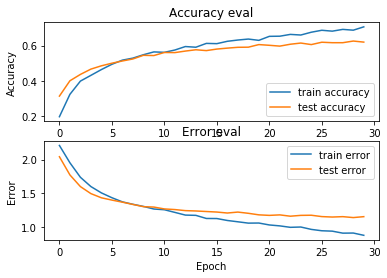

79/79 - 2s - loss: 1.1775 - accuracy: 0.6011

Test accuracy: 0.6011213660240173


In [2]:
# RNN-LSTM (Recurrent Neural Network & Long Short Term Memory)

import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "data.json"


def load_data(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc_values"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)